<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[30-marks]" data-toc-modified-id="Question-1-[30-marks]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [30 marks]</a></span></li><li><span><a href="#Question-2-[35-marks]" data-toc-modified-id="Question-2-[35-marks]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2 [35 marks]</a></span></li><li><span><a href="#Question-4-[35-marks]" data-toc-modified-id="Question-4-[35-marks]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 4 [35 marks]</a></span></li></ul></div>

# Computational Mathematics <a class="tocSkip">

## 2024/25 Assessment  <a class="tocSkip">

## Release: 10AM Thursday 31 October 2024 <a class="tocSkip">

## Deadline: 4PM Friday 1 November 2024 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2024/25.


- **This is independent work, you cannot work in groups.**


- This notebook contains **three** questions. Please answer all questions.

<br>
    
- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any Python library or function we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.

<br>
    
- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
If you choose to submit your solution in something other than a Github classroom, please do it in a format where the marker can easily see your answer text and associated figures. 
 
<br>

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

# Use of generative AI <a class="tocSkip">

If you utilize ChatGPT or any other external tool/reference, this should be clearly indicated via comments in your code and answers, including briefs descriptions of what they were used for and how they were used in the references.md file (links to conversations with ChatGPT should or similar tools should be included in here).

In [293]:
# update as necessary for your solutions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si



# Question 1 [30 marks]

Consider the following two statements

<br>

    - All models are wrong, but some are useful.


    - A model may get the right answer for the wrong reason.


<br>

## (a) Provide your own examples (in words and in code) to convey the importance of each of these two statements. Your code examples can be highly idealised, but in this case include explanations for how these concepts also impact on, and are important in more complex (perhaps real world) models.

<br>


## Question 1 Part A answered

### "all models are wrong, but some are usefull"

Models are used to replicate the behaviour of real world processes. This means all models have limitations, as real world proccesses not only can be effected by an extremely high number of variables, some of which may not not even be known to us. Real world processes are also often continuous which means to model them perfectly we would need to consider the state of what is being modelled at an infinite number of infinitely small points, which is computationally impossible unless we have an infinite amount of time to wait. Given this we can conclude that all models of real world processes are too some degree, wrong. 

However, this does not mean that models cannot be usefull, take for example the behaviour of a mass on a spring which can be modelled using this equation (the simple harmonix equation $$x(t) = A \cos(\omega t + \phi)$$ This is a usefull model as it gives us a resonable approximation of where the mass will be at a time t, however we know it is wrong as it shows no decay in the amplitude which is not possible by the laws of energy conservation.

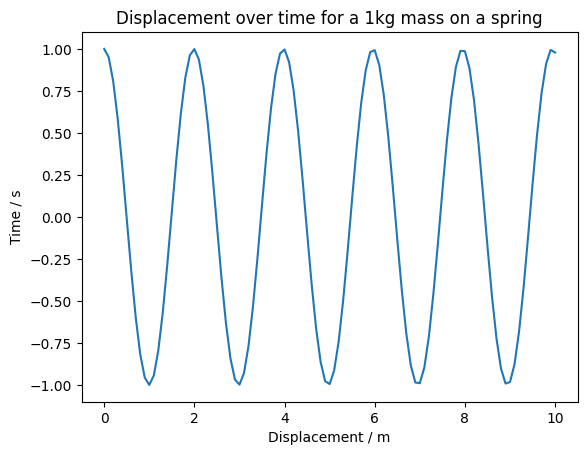

In [294]:
t = np.linspace(0, 10, 101)
k = 10
mass = 1
Amplitude = 1
omega = np.sqrt(k/mass)
phi = 0

x = Amplitude * np.cos(omega * t + phi)

plt.plot(t, x)
plt.xlabel('Displacement / m')
plt.ylabel('Time / s')
plt.title('Displacement over time for a 1kg mass on a spring')
plt.show()

    
    

### "A model may get the right answer for the wrong reason"

Just because all models are wrong doesn't mean some cant be usefull, but this definitely does not mean all can be usefull. For example take the above model, which I said was a usefull for approximating a mass on a spring, used in a different context and this model can be useless and even counterproductive. 

Now lets see how this model fairs at predicting the increase in average global temps over the last 50 years

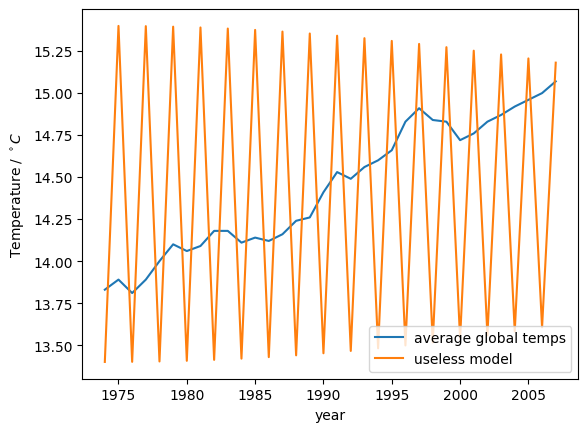

In [295]:
# [1] This data was provided by chat GPT
average_global_temperatures = np.array([
    13.83, 13.89, 13.81, 13.89, 14.00, 14.10, 14.06, 14.09, 14.18, 14.18,
    14.11, 14.14, 14.12, 14.16, 14.24, 14.26, 14.41, 14.53, 14.49, 14.56,
    14.60, 14.66, 14.83, 14.91, 14.84, 14.83, 14.72, 14.76, 14.83, 14.87,
    14.92, 14.96, 15.00, 15.07
])


months = np.arange(1974, 1974 + np.size(average_global_temperatures), 1)

k = 10
mass = 1
Amplitude = 1
omega = np.sqrt(k/mass)
phi = 0

#
x = Amplitude * np.cos(omega * months + phi) + 14.4


plt.plot(months, average_global_temperatures, label='average global temps')
plt.plot(months, x, label='useless model')
plt.xlabel('year')
plt.ylabel('Temperature / $^\\circ C$')
plt.legend(loc='lower right')
plt.show()


Now we can see from the above that while technically this model predicts the right temperature 33 times, it does nothing to show us the trend of the data and thus is right (sometimes) but for the completely wrong reasons.

## (b) Explain the following four concepts: 

        - code verification
        - solution verification
        - model validation
        - model calibration

Include in your explanations what each of these mean, how they are different, and why they are important. 

As part of your explanations, implement your own idealised examples to demonstrate how each of these tasks is performed and/or in the case of the first three how a piece of code or model may "fail" this concept.

<br>

***In this question imagine you are explaining these concepts to one of your classmates before they had started this module - how would you do this in the clearest way possible?***

## Question 1 part B answered

### Code Varification
Code varification is the process of testing that the code you have produced does what you intended it to do. This does not mean it will give your the right asnwer, but it just means there are no bugs. There are 5 reccomended stages to code verification starting with sanity checking, i.e checking the answer 'looks' right. Next you should trend/convservation test your code to see if the behaviour of your answer replicates the expected trend in the physiscs. Next we move onto the qunatitative tests, the first of which being the benchmark test, which means we have to set up our model to replicate the conditions of an accepted benchmark, then test your results agaisnt that of the benchmark. Next we move onto code comparison tests where we check our model agaisnt another similar model the check if they output the same answer for the same inputs, if both are different, this is a good indication that one of them contains bugs. Finally we should test our code agaisnt exact solutions, if we are using numerical solvers for ODE's/ PDE's this is expacially usefull to check how well our model is replicating the theoretical exact solution, if it is not possible for you to find an exact solution to the equations involved you can use the Method of Manufactured solutions which means making up an exact solution and creating the ODE/PDE from that using differentiation. 

### Solution Varification 

Solution varification involves testing how your model reacts to different input parameters. This is important for eliminating error caused by the user, for example if a user inputs a time step too large or a mesh too course this can cause out solution to not converge or even diverge. This is usefull for informing the user on the limits of the model given the computational power available. A bad case would be if the model converges to a result even thought the input parameters are wrong, this can be dangerous as it may give a false sense of security in the model being robust while it is actually giving a completely wrong answer. There are two main methods of solution varification, error estimation and sensitivity testing. Error estimation involves using mathematical tests to estimate the error in our solution, from this we can decide whether our models error is acceptable or not for a given purpose. Sensitivity testing involves running our model multiple times varying just one parameter, e.g. mesh size, each time and seeing how our model reacts to the change in parameter, this can give us an idea of the upper bounds of each parameter that can be used giving us an idea of the tradeoff between accuracy and solution time. 

### Model Validation

Model validation is process and testing our models ability to replicate real world results, for example, in my undergraduate dissertation I developed a CFD model of cavitation on a novel shape of marine propeller. To do this I first had to find a setup that accurately modelled a real world version of this. To do this I had to use my model to recreate the exact conditions of a lab experiment detailed in a scientific paper, this meant using the exact proportions of the flow tank and a 3D model the exact same propeller they used. Doing this allowed me to run my model under the range of conditions that were used in the paper and compare my models prediction of cavitation to what was observed under experimental conditions. This gave me an idea of the sort of errors to expect when using my model to estimate cavitation on the novel propeller I was testing. While it was good to compare my model to data collected in a lab, this validation was strictly speaking incomplete as the real use in models is in modelling the real world, not an idealised version created in a lab, so for complete model validation ideally we need to compare our model to data acheived in a real world scenario i.e. in the case of my dissertaiton this would mean collecting cavitaiton data for a boat propeller on open water, however this is in practice not as easy to obtain. 

### Model Calibration

Model calibration can be used to minimise errors in a models solution caused by it not being able to fully model all the processes observed in the real world. For example in my dissertation where I used a CFD model I used a turbulence model which is a form of calibration. In theory I could model the turbulent processes without the turbulence model if I had a fine enough mesh to capture the turbulent processes which can occur on a very small scale, however this is often not computationally feesable so by using a turbulence model, my results were calibrated to account for (some of) the effects of turbulence to produce results closer to the real world.



# Question 2 [35 marks]

From our work on probability and the Gaussian distribution we made use of the following function

$$f(x) := \frac{1}{\sqrt{\pi}} e^{-x^2} $$


<br><br>

(a) Consider this function over the interval  $-10 < x < 10$. 
You can evaluate this function in order to sample it at a series of $x$ values of your choice, i.e. to form a series of data points $(x_i,f(x_i))$. Based on this data, compare the abilities of polynomial interpolation and piecewise polynomial interpolation of different degrees to provide a good approximation to the underlying function.

<br><br>

(b) We know that this function has the following integral value over the infinite interval $-\infty < x < \infty$

$$\int_{-\infty}^{\infty} f(x)\, dx = 1 $$


Perform quadratue to approximate this integral. The first thing you will need to do is to reduce the infinite interval to a finite one, you should comment on how you decide to do this as part of your answer. Comment and demonstrate ways in which you can obtain the most accurate answer possible for the minimum number of function evaluations.




## Question 2 part A answered

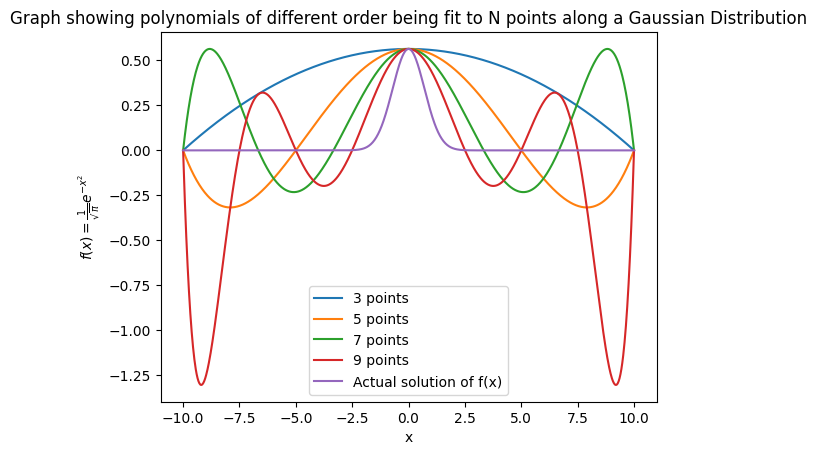

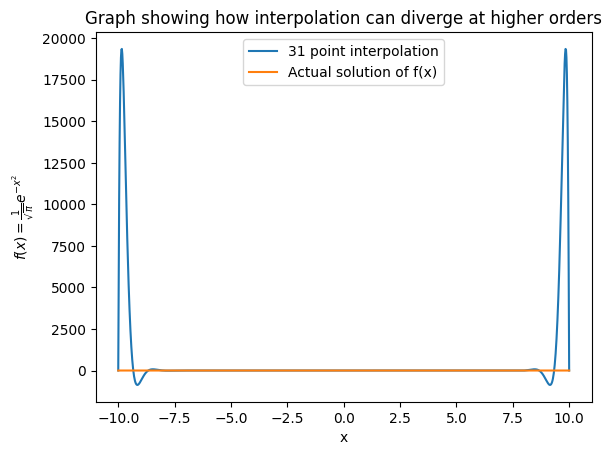

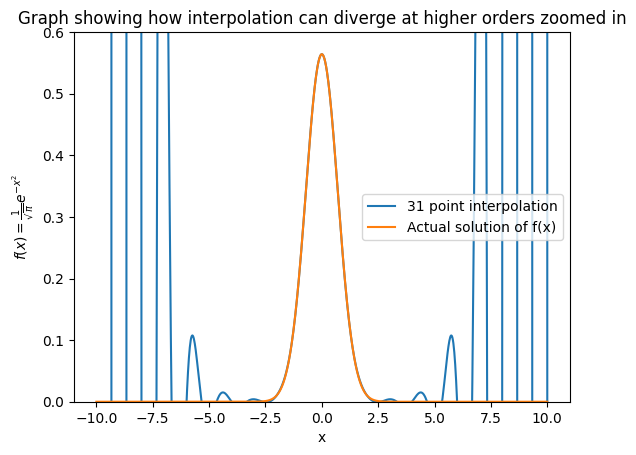

In [296]:
# [2] Chat GPT was used to help with structuring of the code in this cell and for formulating some of the plots

# Construct the interpolant at these x points for plotting
N = 1000
x = np.linspace(-10, 10, N)

# Evaluate the function over the refined range of x
gaussian = lambda x: (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)

# Evaluate the exact function at the x values
y = gaussian(x)

# Plot interpolated polynomials of different degrees
for n in range(3, 11 ,2):
    # Select n evenly spaced points on the gaussian function 
    xi = np.linspace(np.min(x), np.max(x), n)
    yi = gaussian(xi)

    # Perform Lagrange interpolation
    P = si.lagrange(xi, yi)

    # Evaluate the Lagrange polynomial at the points in x
    P_values = P(x)
    
    # Plot interpolated polynomial
    plt.plot(x, P_values, label=f'{n} points')

# Plot exact function
plt.plot(x, y, label='Actual solution of f(x)')
plt.title('Graph showing polynomials of different order being fit to N points along a Gaussian Distribution')
plt.xlabel('x')
plt.ylabel(r'$f(x) = \frac{1}{\sqrt{\pi}} e^{-x^2}$')
plt.legend()
plt.show()

# Plot a polynomial of higher degrees to demonstrate how the approximation can fail
# select 31 evenly spaced points on the gaussian function 
xi = np.linspace(np.min(x), np.max(x), 31)
yi = gaussian(xi)

P_all = si.lagrange(xi, yi)
P_all_values = P_all(x)

plt.plot(x, P_all_values, label='31 point interpolation')

# Replot exact solution
plt.plot(x, y, label='Actual solution of f(x)')
plt.xlabel('x')
plt.ylabel(r'$f(x) = \frac{1}{\sqrt{\pi}} e^{-x^2}$')
plt.title('Graph showing how interpolation can diverge at higher orders')
plt.legend()
plt.show()

# Replot n = 31 polynomial zoomed in
P_all_zoomed = si.lagrange(xi, yi)
P_all_zoomed_values = P_all_zoomed(x)

plt.plot(x, P_all_zoomed_values, label='31 point interpolation')
plt.plot(x, y, label='Actual solution of f(x)')
plt.xlabel('x')
plt.ylabel(r'$f(x) = \frac{1}{\sqrt{\pi}} e^{-x^2}$')
plt.ylim(0, 0.6)
plt.title('Graph showing how interpolation can diverge at higher orders zoomed in')
plt.legend()
plt.show()

### Discussion of the ability of polynomial interpolation to model a Normalised Gaussian function

We can see from the above graph that as we increase the order of the polynomail used to model the normalised gaussian function the better it predicts the shape of the charecteristic bulge in the center, however we can also see that this comes at the cost of increased instabilities away from the center. 

In the second graph showing an interpolated polynomial at 20 points we can see how these instabilities can quickly diverge away from the center to be far out of the range of the gaussian function, however if we zoom in on the same graph (Graph 3) we can see how the characteristic bulge at the center is modelled to a very high degree of accuracy

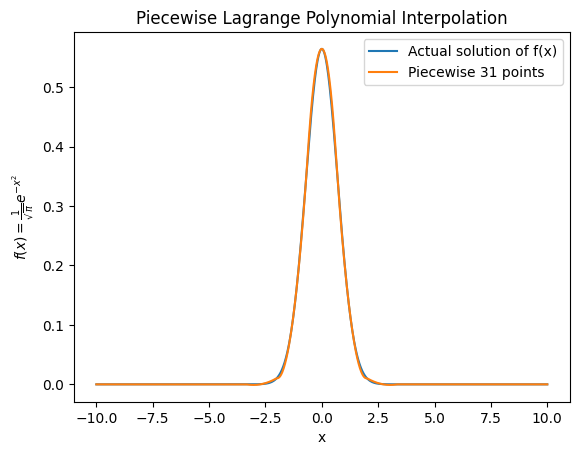

In [297]:
# [2] Chat GPT was used to help with structuring of the peicewise polynomial function in this cell

# Construct the interpolant at these x points for plotting
x = np.linspace(np.min(xi), np.max(xi), 1000)

# Define the gaussian function 
gaussian = lambda x: (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)

# Evaluate function over range of x
y = gaussian(x)

# Define data points to create poly
N = 31
xi = np.linspace(-10, 10, N)
yi = gaussian(xi)

# Define order of piecewise functions
p = 2

def piecewise_polynomial_interpolation(xi, yi, p):

    # Construct the interpolant at these x points for plotting
    x = np.linspace(np.min(xi), np.max(xi), 1000)
    
    # Initialise piecewise function output array
    P_PW = np.zeros(np.size(x))

    # Now fit a piecewise polynomial of degree p at N intervals in x
    for i in range(0, len(xi) - 1 - p, p):
        # Use Lagrange interpolation to construct a local polynomial fit to data 
        P_Lagrange = si.lagrange(xi[i:i + p + 1], yi[i:i + p + 1])
        
        # Use the polynomial to evaluate at the x values for each piecewise interval
        x_int = x[(x >= xi[i]) & (x <= xi[i + p])]
        P_PW[(x >= xi[i]) & (x <= xi[i + p])] = P_Lagrange(x_int)

    # Return result
    return P_PW, x

# Call function
P_PW, x = piecewise_polynomial_interpolation(xi, yi, p)

# Plot exact function and piecewise polynomials 
plt.plot(x, y, label='Actual solution of f(x)')
plt.plot(x, P_PW, label='Piecewise 31 points')
plt.legend(loc='best')
plt.title('Piecewise Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel(r'$f(x) = \frac{1}{\sqrt{\pi}} e^{-x^2}$')
plt.show()



### Discussing ability of Interpolation vs Peice wise interpolation model functions

Above we can see how peicewise quadratic interpolation performes when interpolating between 31 points. As we can see it has done a very good job of predicting the curve through all X. If we compare this to the single interpolating performed on the 31 points from the previous section, we can see that while they both model the central bell to a high degree of accuracy, peicewise interpolation is far better at modelling the flatter reigons of the distribution showing no visible oscillations as was observed in the single peicewise interpolation. 

## b)

We know that this function has the following integral value over the infinite interval $-\infty < x < \infty$

$$\int_{-\infty}^{\infty} f(x)\, dx = 1 $$

Perform quadratue to approximate this integral. The first thing you will need to do is to reduce the infinite interval to a finite one, you should comment on how you decide to do this as part of your answer. Comment and demonstrate ways in which you can obtain the most accurate answer possible for the minimum number of function evaluations.

## Question 2 part B Answered

First we should choose finite boundaries that capture most of the integral. We know from statistics that a boundary of 3 standard deviations outside the mean captures 99.7% of the distribution. knowing this we know we can safely capture most of the integral for a distribution of SD = 1 and mean = 0, as represented by the normalised gaussian function, using integral limits of -5 and 5 

100


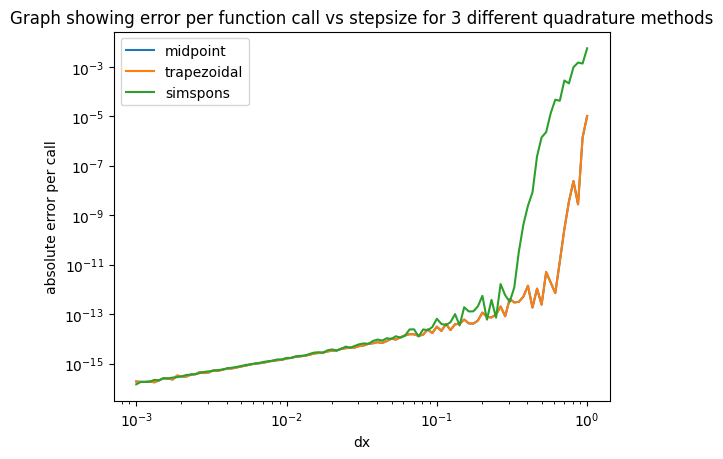

In [298]:
# define normalised gaussian

def normalised_gaussian(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)

# define a function to carry out midpoint

def midpoint_quadrature(f,xmin,xmax,dx):
    #define x values and include midpoints
    x = np.arange(xmin,xmax,dx)

    #define the f for all points section
    y_0 = f(x)
    #print(y_0)
    y_1 = np.roll(y_0,-1)

    # cut off last val or each 
    y_0 = y_0[:-1]
    y_1 = y_1[:-1]

    # perform trapezoidal area calc
    Is = (y_0 + (y_1 - y_0) / 2) * dx
    #print(Is)

    # sum values in trapezoidal area array
    I = np.sum(Is)

    #calc function calls not forgetting removed elements
    n_calls = np.size(y_0) + 1

    return I, n_calls

# define a function to carry out simpsons

def trapezoidal_quadrature(f,xmin,xmax,dx):
    # define x values and include midpoints
    x = np.arange(xmin,xmax,dx)

    # define the f for all points section
    y_0 = f(x)

    # define y+1 as a vector
    y_1 = np.roll(y_0,-1)

    # cut off last val of each 
    y_0 = y_0[:-1]
    y_1 = y_1[:-1]

    # perform trapezoidal area calculation
    Is = (y_1 + y_0) / 2 * dx
    #print(Is)

    # sum values in trapezoidal area array
    I = np.sum(Is)

    #calc function calls not forgetting removed elements
    n_calls = np.size(y_0) + 1

    return I, n_calls

# define a function for simpsons quadrature 

def simpsons_quadrature(f,xmin,xmax,dx):
    # define x values and include midpoints
    x = np.arange(xmin,xmax,dx)

    # define the f for all points section
    y = f(x)

    # define the first section
    P = 0
    h = dx/2
    A = [h/3, 4*h/3, h/3]

    # calc y + 1 array
    y_2 = np.roll(y,-1)

    #calculate midpoints x,y
    x_1 = np.roll(x,-1)
    y_1 = f(x + (x_1-x)/2)

    # cut off last val or each 
    y = y[:-1]
    y_1 = y_1[:-1]
    y_2 = y_2[:-1]
 
    # calculate lagrange values for entire array
    P_int = h/3 * (y + 4*y_1 + y_2)

    # sum values
    P = np.sum(P_int)

    # calculate number of function calls not forgetting removed elements
    n_calls = (np.size(y) + 1) + (np.size(y_1) + 1)

    return P, n_calls


# define limit 
L = 5

# define x vals

x = np.linspace(-L, L, 1000)

#define dx
dx = 0.1

# initialise error arrays
midpoint_errors_per_call = []
trapezoidal_errors_per_call = []
simpsons_errors_per_call = []

dxs = np.logspace(-3, 0, 100)

for dx in dxs:
    # perform quadrature using midpoints rule
    
    I_midpoint, n_calls_midpoint = midpoint_quadrature(normalised_gaussian, -L, L, dx)
    #print(f'Quadrature using midpoint approximation gave {I_midpoint} with {n_calls_midpoint} calls')
    
    # perform quadrature using trapezoidal rule
    
    I_trapezoidal, n_calls_trapezoidal = trapzezoidal_quadrature(normalised_gaussian, -L, L, dx)
    #print(f'Quadrature using trapezoidal approximation gave {I_trapezoidal} with {n_calls_trapezoidal} calls')
    
    # perform quadrature using simpsons rule 
    
    I_simpsons, n_calls_simpsons = simpsons_quadrature(normalised_gaussian, -L, L, dx*2)
    #print(f'Quadrature using simpsons approximation gave {I_simpsons} with {n_calls_simpsons} calls')

    # calculate errors 

    midpoint_errors_per_call.append(abs(I_midpoint - 1) / n_calls_midpoint)
    trapezoidal_errors_per_call.append(abs(I_trapezoidal - 1) / n_calls_trapezoidal)
    simpsons_errors_per_call.append(abs(I_simpsons - 1) / n_calls_simpsons)

# plot errors per call agaisnt dx

print(np.size(midpoint_errors_per_call))

plt.loglog(dxs, midpoint_errors_per_call, label="midpoint")
plt.loglog(dxs, trapezoidal_errors_per_call, label="trapezoidal")
plt.loglog(dxs, simpsons_errors_per_call, label="simspons")
plt.xlabel('dx')
plt.ylabel('absolute error per call')
plt.title('Graph showing error per function call vs stepsize for 3 different quadrature methods')
plt.legend()
plt.show()



### Discussing which method gives the largest decrease in error per function call

From the graph above we can see that for larger dx values the error (per function call) in the quadrature approximation of the integral is lower for the midpoint and trapezoidal methods, however as dx reduces all 3 methods seem to show the same decrease in error for decreasing dx

# Question 4 [35 marks]

Recall the Taylor series expansion, which can be written in the form

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4),$$

where we're using the notation $\,y_n := y(t_n)\,$ and $\,y'_n := f(t_n,y_n)\,$.

<br>

We used this expansion, dropping second-order terms, and replacing THE unknown $y'_n$ with the known right hand side (RHS) function ($f$), as a means to derive the simple first-order forward Euler scheme as a solver for ODEs.

<br>

One way to derive higher-order schemes is to attempt to keep additional terms in this expansion. This should clearly, by definition, result in ODE solvers with higher-order errors.

However, to obtain a usable scheme we need to write these additional terms in terms of things that we know - note that for a general ODE problem we don't know $\,y'', \, y'''\, ...$  as we don't know the exact solution of course.

However, we do know the RHS function $f$ and using the chain rule we can equate the unknown $y$ derivatives with $f$ derivatives that we can calculate from the given form of $f$:

$$ y'' = \frac{dy'}{dt} = \frac{df(t,y(t))}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}\frac{d y}{d t} = f_t + f_y \, y' = f_t + f \, f_y,  $$

where we're using the notation for partial derivatives

$$f_t \equiv \frac{\partial f}{\partial t}, \;\;
f_y \equiv \frac{\partial f}{\partial y}$$


Similarly,  use of the chain rule can be shown to yield

$$ y''' = f_{tt} + 2f\,f_{yt} + f_t\,f_y + f\,f_y^2 + f^2\,f_{yy}, $$

where 

$$f_{tt} \equiv \frac{\partial^2 f}{\partial t^2}, \;\;
f_{yt} \equiv \frac{\partial^2 f}{\partial y \partial t}, \;\;
f_{yy} \equiv \frac{\partial^2 f}{\partial y^2}$$


<br>

Now since we know $f$ as a function of $t$ and $y$ we can in principle compute all of these terms for a given $f$ function and evaluate them at time level $n$ to achieve a higher-order time-stepping method via the Taylor series expansion.


<br> <br>

(a) Write a solver or solvers that implement the above idea and test it using the simpler cases where the RHS is a function of $y$ only and where it is a function of $t$ only - you can choose your own test cases here. Comment why these two scenarios (i.e. what the RHS is a function of) are fundamentally different in terms of expected error growth.

<br> <br>

(b) Now verify your solver using the following test case where the RHS function depends on both $y$ and $t$:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6 $$

Consider this problem up to time $t=3$.

Comment on whether your convergence results give what would be expected based on a theoretical error analysis of your methods.

<br>

Demonstrate and explain why the RMS (root-mean-square) and max norm approaches to estimate the error in the numerical solution are sensible choices, while the standard 1 (taxi-cab) and 2 (Euclidean) norms are poor choices.


## Question 3 part A answered

In [300]:
# [3] Chat GPT was used in this cell to advise me on how to structure the solve_ode_euler function

# wiritng a general solver for the first 4 terms

def solve_ode_euler(t0, y0, h, nums_teps, derivs):
    
    ts = []
    ys = []

    t = t0
    y = y0

    ts.append(t0)
    ys.append(y0)


    for _ in range(num_steps):

        #precalculate derivatives to prevent repeated funciton calls 
        
        f_val = derivs['f'](t, y)         # f(t, y)
        ft_val = derivs['ft'](t, y)       # df/dt
        fy_val = derivs['fy'](t, y)       # df/dy
        ftt_val = derivs['ftt'](t, y)     # d²f/dt²
        fyy_val = derivs['fyy'](t, y)     # d²f/dy²
        fty_val = derivs['fty'](t, y)     # d²f/dtdy

        #debugging derivatives
        #print(f"f(t, y): {f_val}, ft: {ft_val}, fy: {fy_val}, ftt: {ftt_val}, fyy: {fyy_val}, fty: {fty_val}")

        # Taylor series expansion up to the 4th term
        y_next = (
        y
        + h * f_val
        + (h ** 2 / 2) * (ft_val + fy_val * f_val)
        + (h ** 3 / 6) * (
            ftt_val
            + 2 * f_val * fty_val
            + ft_val * fy_val
            + f_val * fy_val ** 2
            + f_val ** 2 * fyy_val
            )
        )

        # Debugging y_next value
        #print(f"y_next: {y_next}")

        

        t += h
        y = y_next
        ts.append(t)
        ys.append(y)

    return ts, ys

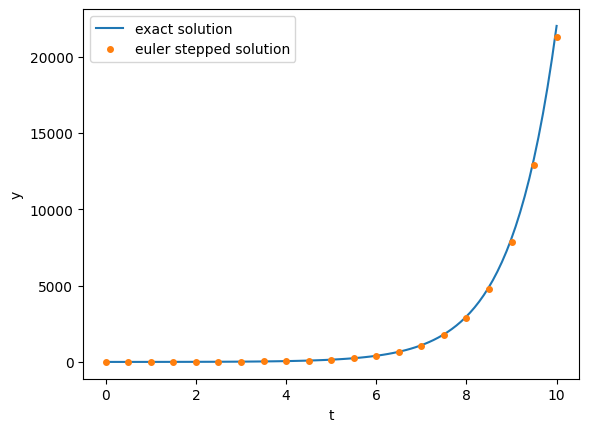

In [301]:
# testing a simple case where rhs is a function of y only 

# choose an ODE y' = f(t)
    
# calc derivatives and define them as functions

derivs = {
        'f': lambda t, y: y,             # f(t, y) = y
        'ft': lambda t, y: 0,            # df/dt = 0
        'fy': lambda t, y: 1,            # df/dy = 1
        'ftt': lambda t, y: 0,           # d²f/dt² = 0
        'fyy': lambda t, y: 0,           # d²f/dy² = 0
        'fty': lambda t, y: 0            # d²f/dtdy = 0
        }

# define ICs
y0 = 1
t0 = 0

# define x vals

t = np.linspace(0,10,100)

# compute exact solution
y = np.exp(t)

#plot result
plt.plot(t,y, label='exact solution')

# define time step and number of steps
dt = 0.5
num_steps = 20

# call ode solver
euler_solved = solve_ode_euler(t0, y0, dt, num_steps, derivs)
t = euler_solved[0]
y = euler_solved[1]

# plot solver values
plt.plot(t, y, label='euler stepped solution', marker='o', linestyle=' ',markersize=4 )
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

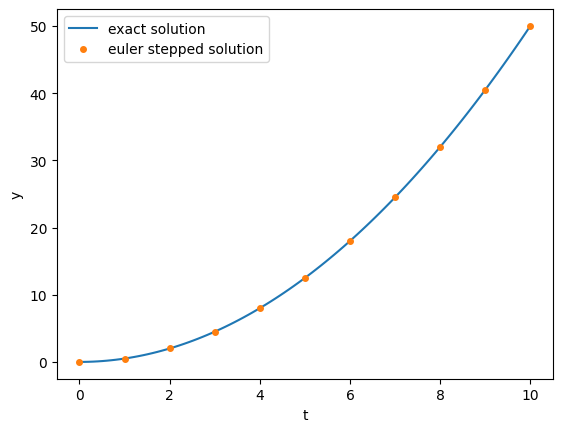

In [303]:
# testing a simple case where rhs is a function of t only 

# choose an ODE y' = sin(t)
    
# calc derivatives and define them as functions

derivs = {
    'f': lambda t, y: t,         # f(t, y) = t
    'ft': lambda t, y: 1,        # df/dt = 1
    'fy': lambda t, y: 0,        # df/dy = 0
    'ftt': lambda t, y: 0,       # d²f/dt² = 0
    'fyy': lambda t, y: 0,       # d²f/dy² = 0
    'fty': lambda t, y: 0        # d²f/dt∂y = 0
}

# define ICs
y0 = 0
t0 = 0

# define x vals

t = np.linspace(0,10,100)

# compute exact solution
y = 0.5 * t ** 2

#plot result
plt.plot(t,y, label='exact solution')

# define time step and number of steps
dt = 1
num_steps = int(10/dt)

# call ode solver
euler_solved = solve_ode_euler(t0, y0, dt, num_steps, derivs)
t = euler_solved[0]
y = euler_solved[1]

# plot solver values
plt.plot(t, y, label='euler stepped solution', marker='o', linestyle=' ',markersize=4 )
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### Discussion of how errors increase with increasing timestep for ODE's where RHS = f(y) vs RHS = f(t)

For the case where dy/dt = f(y) we know that the exact solution will involve exponentials and there for the derivatives will have steeper gradients for values of t >> 0, while for cases where dy/dt = f(t) we know the exact solution will involve polynomials and therefor the for t >> 0 the gradients will be less than for the dy/dt = f(y) case. This means that the rate of error accumulation for the dy/dt = f(y) case will be much larger. 

## Question 3 Part B Answered

(b) Now verify your solver using the following test case where the RHS function depends on both $y$ and $t$:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6 $$

Consider this problem up to time $t=3$.

Comment on whether your convergence results give what would be expected based on a theoretical error analysis of your methods.

<br>

Demonstrate and explain why the RMS (root-mean-square) and max norm approaches to estimate the error in the numerical solution are sensible choices, while the standard 1 (taxi-cab) and 2 (Euclidean) norms are poor choices.


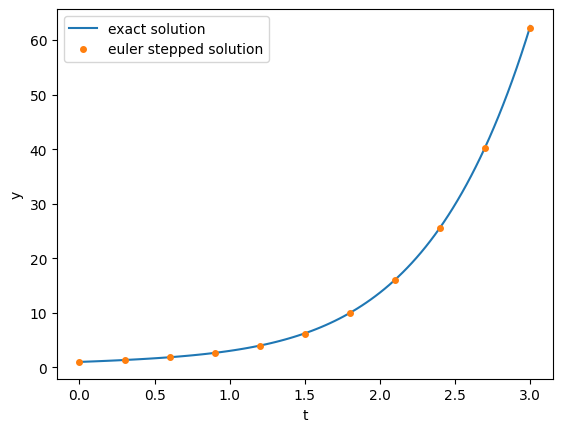

In [304]:
# testing a simple case where rhs is a function of t only 

# choose an ODE y' = sin(t)
    
# calc derivatives and define them as functions

derivs = {
    'f': lambda t, y: y + t ** 3,        
    'ft': lambda t, y: 3 * t ** 2,      
    'fy': lambda t, y: 1,            
    'ftt': lambda t, y: 6 * t,           
    'fyy': lambda t, y: 0,     
    'fty': lambda t, y: 0            
}

# define ICs
y0 = 1
t0 = 0

# define t vals
t = np.linspace(0,3,100)

# compute exact solution
y = 7 * np.exp(t) - t ** 3 - 3 * t ** 2 - 6 * t - 6

#plot result
plt.plot(t,y, label='exact solution')

# define time step and number of steps
t_max = 3
num_steps = 10
dt = t_max/num_steps

# call ode solver
euler_solved = solve_ode_euler(t0, y0, dt, num_steps, derivs)
t = euler_solved[0]
y = euler_solved[1]

# plot solver values
plt.plot(t, y, label='euler stepped solution', marker='o', linestyle=' ',markersize=4 )
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

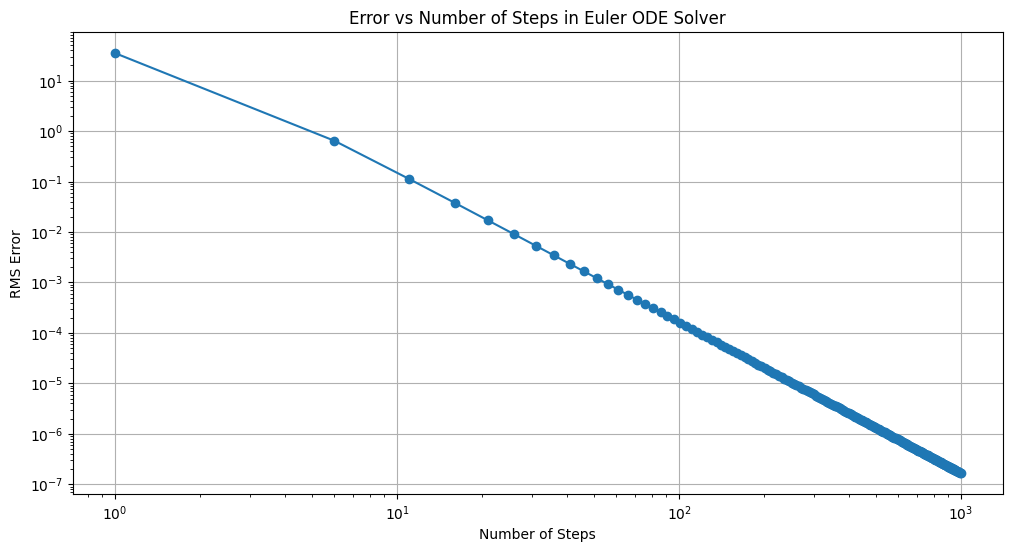

In [305]:
# Define initial conditions
y0 = 1
t0 = 0

# Define the maximum time and a range of step numbers
t_max = 3
step_counts = np.arange(1, 1001, 5)  # From 1 to 100 steps, incrementing by 5
RMS_errors = []
max_norm_errors = []
one_norm_errors = []
two_norm_errors = []

# Iterate over each step count
for num_steps in step_counts:
    dt = t_max / num_steps

    # Call the ODE solver
    euler_solved = solve_ode_euler(t0, y0, dt, num_steps, derivs)
    t_numerical = np.array(euler_solved[0])
    y_numerical = np.array(euler_solved[1])

    # Calculate the exact solution at time points used in solver
    y_exact = 7 * np.exp(t_numerical) - t_numerical ** 3 - 3 * t_numerical ** 2 - 6 * t_numerical - 6

    # Compute errors with 4 different norm types
    RMS_errors.append(np.sqrt(np.mean((y_numerical - y_exact)**2)))
    max_norm_errors.append(np.linalg.norm(y_numerical - y_exact, ord=float('inf')))
    one_norm_errors.append(np.linalg.norm(y_numerical - y_exact, ord=1))
    two_norm_errors.append(np.linalg.norm(y_numerical - y_exact, ord=2))
    
                           
# Plotting the RMS errors vs step count
plt.figure(figsize=(12, 6))
plt.loglog(step_counts, RMS_errors, marker='o', linestyle='-')
plt.xlabel('Number of Steps')
plt.ylabel('RMS Error')
plt.title('Error vs Number of Steps in Euler ODE Solver')
plt.grid()
plt.show()
    

### Discussing convergence results
From our log log plot of errors we can see that the error plot converges to a straight line with gradient -4. We know this to be consistent with theory as the ODE solver we have implemented includes the first 4 terms of the taylor series approximation giving it a truncation error of $O$($\Delta t^4$). This means that as $\Delta t \to 0$ the $\Delta t^4$ term of the error dominates, i.e. when plotted on a loglog $$\log(\text{error}) \propto \log(\Delta t^4)$$ = $$\log(\text{error}) \propto 4\log(\Delta t)$$ or in our case where $\Delta t^4 \propto Nsteps^{-1}$ $$\log(\text{error}) \propto \log(Nsteps ^{-4})$$ = $$\log(\text{error}) \propto -4\log(\Delta t)$$



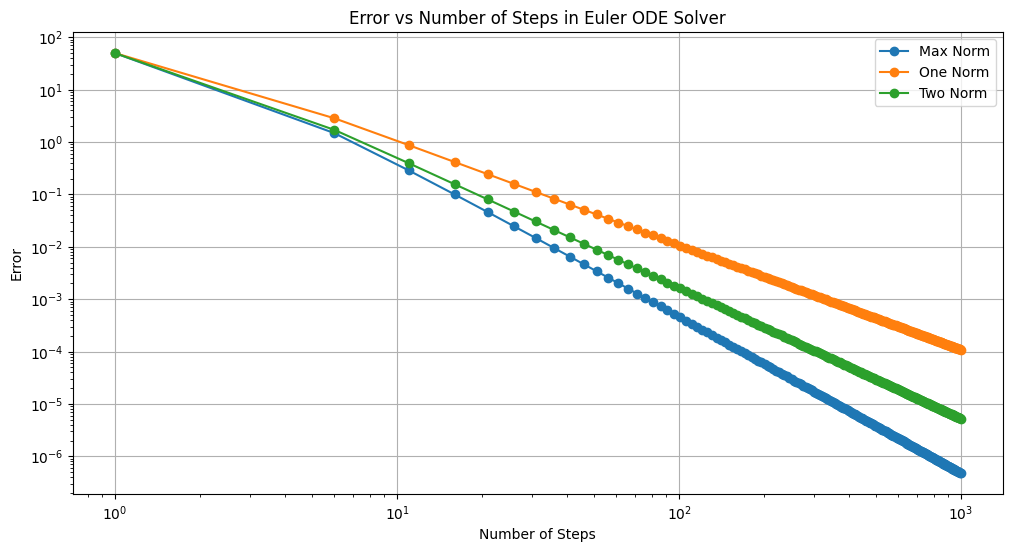

In [307]:
# [3] Chat GPT was used in this cell to help write the plots

# Plotting max norm errors vs step count
plt.figure(figsize=(12, 6))  # Adjusted size for a smaller plot
plt.loglog(step_counts, max_norm_errors, label='Max Norm', marker='o', linestyle='-')
plt.loglog(step_counts, one_norm_errors, label='One Norm',marker='o', linestyle='-')
plt.loglog(step_counts, two_norm_errors, label='Two Norm',marker='o', linestyle='-') 
plt.xlabel('Number of Steps')
plt.ylabel('Error')
plt.title('Error vs Number of Steps in Euler ODE Solver')
plt.grid()
plt.legend()
plt.show()




### Discussing Norm choices when caclulating errors
As we can see from the above plot the max norm loglog plot represents the decrease in error with number of steps accurately to what we observed in the RMS error plot, as we observe a gradient of $-4$. As discussed above we know from theory that this is the correct expected rate fo error decrease for our solver. 

The Graphs where error is calculated using the one and two norm show rates of error decrease that are not consistent with the theory.

# END